In [34]:
import sys
import os
import numpy as np
import time
# Add the parent folder to sys.path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import density_generator
import numpy as np
import matplotlib.pyplot as plt
import qutip
import importlib
import helper_functions
import classicalQFI
import quantum_subroutines_pennylane
import vqfe_subroutine
import pennylane as qml
import circuit_generator
from scipy.linalg import eigh
#from pennylane import numpy as np

from random import randint
importlib.reload(density_generator)
importlib.reload(helper_functions)
importlib.reload(quantum_subroutines_pennylane)
importlib.reload(vqfe_subroutine)
importlib.reload(circuit_generator)
importlib.reload(classicalQFI)

pass;


In [91]:
#in the paper the purity ranges bewtween 
# 0.75 - 0.95 
# good candidates N=9,n=8 _> explodes on quantum
# good quantum N=5,n=4


In [86]:
N=5
n=4
#trace_out_indices = np.random.choice(range(N), size= N - n, replace=False)
time_t = 1.0
J=1
delta=0.5
delta_h_x=0.1

#h_x=0.5
m=1
# initial_state=None
DEBUG=False
derivative_delta=1e-3
trotter_steps_K = 10
trotter_order = 2
print("N =",N, " starting number of qubits, before tracing out")
print("n =",n," final number of qubits")
try : 
    print("trace_out_indices =",trace_out_indices)
except NameError:
    pass
print("J =",J)
#print("h_z =",h_z)
try:
    print("h_x =",h_x)
except NameError:   
    pass
print("delta_h_x =",delta_h_x)
print("delta =",delta)
print("m =",m)
#print("DEBUG is set to: ",DEBUG)
print("trotter_steps_K =",trotter_steps_K)
print("trotter_order =",trotter_order)

N = 5  starting number of qubits, before tracing out
n = 4  final number of qubits
trace_out_indices = [1]
J = 1
h_x = 2.5
delta_h_x = 0.1
delta = 0.5
m = 1
trotter_steps_K = 10
trotter_order = 2


In [87]:
 #model = density_generator.SpinChainXXZ(n=N, J=J, h_z=h_z, initial_state="0", DEBUG=DEBUG) 
iters = 25
purities = np.zeros(iters, dtype=complex)
h_x_grid = np.linspace(0, 2.5, iters) # range of h_x values to test

for (i , h_x) in enumerate(h_x_grid):
    trace_out_indices = np.random.choice(range(N), size= N - n, replace=False)
    #h_x= np.random.random() * 2.5   
    model = density_generator.TransverseFieldIsingModel(n=N, J=J, h_x=h_x, initial_state="0", DEBUG=DEBUG) 
    rho_mixed, _ = model.generate_mixed_states_with_perturbation(
        delta_h_x=delta_h_x,
        trace_out_indices=trace_out_indices,
        time=time_t,)
    purities[i] = np.trace(rho_mixed @ rho_mixed)

#classicalQFI.compute_tqfi_bounds(rho_mixed, rho_delta_mixed, m, delta, DEBUG=False)

(array([5.74894882, 5.74894882, 7.66526509, 3.83263254, 1.91631627,
        1.91631627, 3.83263254, 0.        , 1.91631627, 0.        ,
        1.91631627, 0.        , 0.        , 1.91631627, 0.        ,
        0.        , 0.        , 1.91631627, 1.91631627, 7.66526509]),
 array([0.58253238, 0.60340576, 0.62427914, 0.64515252, 0.6660259 ,
        0.68689928, 0.70777266, 0.72864604, 0.74951943, 0.77039281,
        0.79126619, 0.81213957, 0.83301295, 0.85388633, 0.87475971,
        0.89563309, 0.91650648, 0.93737986, 0.95825324, 0.97912662,
        1.        ]),
 <BarContainer object of 20 artists>)

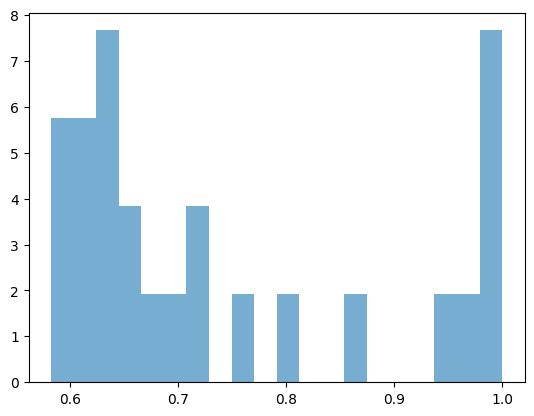

In [88]:
plt.hist(purities.real, bins=20, density=True, alpha=0.6)

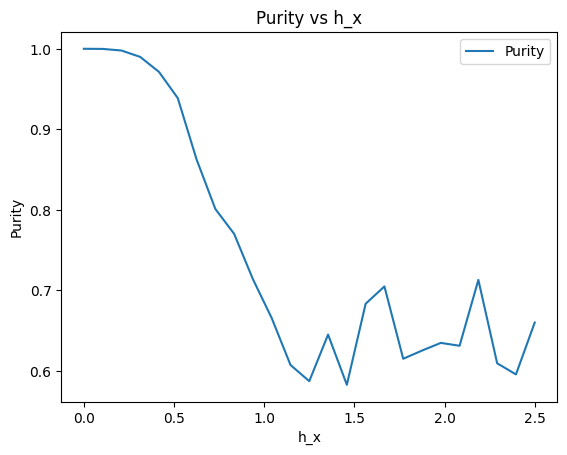

In [89]:
plt.plot(h_x_grid, purities.real, label='Purity')
plt.xlabel('h_x')
plt.ylabel('Purity')
plt.title('Purity vs h_x')
plt.legend()

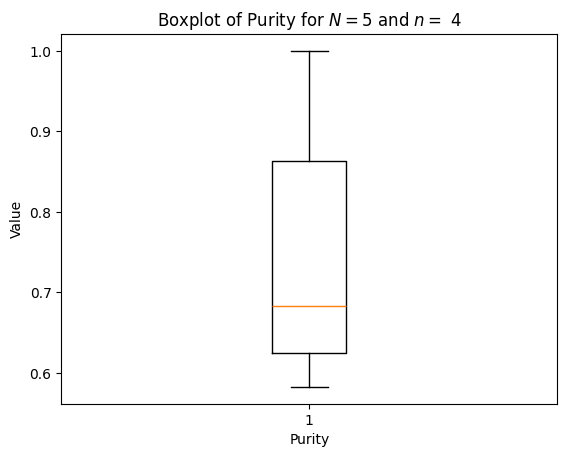

In [90]:
plt.boxplot(purities.real, vert=True)
plt.xlabel('Purity')
plt.ylabel('Value')
plt.title(f'Boxplot of Purity for $N = ${N} and $n =$ {n}')
plt.show()